

# Project: Medical appointments data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

***I will analyze a kaggle dataset containing 100k medical appointments in Brazil, to examine the data characteristics and deduce what are the major factors behind the no show of patients***

***and Documente the analysis process along with visualizations to explain the findings and support the conclusions drawn.***

***Tool: Jupyter Notebook (Python)***

***Programming library: pandas, numpy, matplotlib, seaborn***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

we are trying to know which variable may be related to appointment commitment 

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
df = pd.read_csv(noshowappointments-kagglev2-may-2016.csv')
df.head(50)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


there are no null values

In [9]:
df.duplicated().sum()

0

there are no duplicated entries

In [3]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning 
we don't need PatientId or AppointmentID so let's drop it <br>
correct the misspelling in hipertension<br>
and change '-' in No-show to '_' to be more consistent

In [13]:

df.drop(['PatientId', 'AppointmentID'],axis = 1 , inplace = True)


In [14]:
df.rename(columns={"Hipertension":"Hypertension","No-show":"No_show"},inplace=True)

df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis



Do alcoholic patients are more  likely to miss their appointment ?

In [15]:
df.groupby("No_show").Alcoholism.value_counts()

No_show  Alcoholism
No       0             85525
         1              2683
Yes      0             21642
         1               677
Name: Alcoholism, dtype: int64

it seems that number of non alcoholic patients who didn't show up is much more than alcoholic 
I'll calculate the proportions to be more precisely

In [16]:
Alcoholic_Proportion = 677/(21642+677)
Non_Alcoholic_Proportion = 21642/(21642+677)

now we wil use visualization

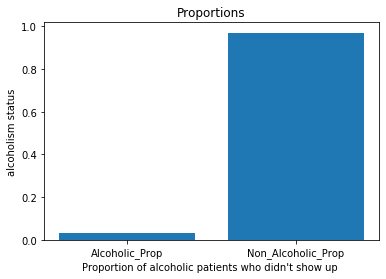

In [20]:
def bar(A,B,A_hieght,B_hieght,xlabel,ylabel,title):
    plt.bar([A,B],[A_hieght,B_hieght])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);
    
bar("Alcoholic_Prop","Non_Alcoholic_Prop",Alcoholic_Proportion,Non_Alcoholic_Proportion,\
    "Proportion of alcoholic patients who didn't show up ","alcoholism status","Proportions")


as we expected, the proportions show the same results as the non_alcoholic proportion is more than the alcoholic

Another visualization with pie chart

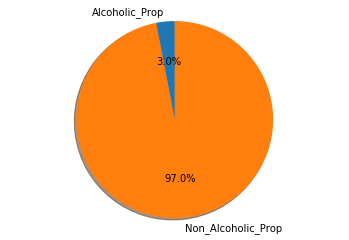

In [13]:
labels='Alcoholic_Prop','Non_Alcoholic_Prop'
sizes=[Alcoholic_Proportion,Non_Alcoholic_Proportion]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal');

from visualizations it seems that there is no correlation between alcoholism and missing the appointment

what about the relationship between the age and appointment commitment ?

In [26]:
df.groupby('No_show').Age.mean()

No_show
No     37.790064
Yes    34.317667
Name: Age, dtype: float64

In [25]:
df.groupby('No_show').Age.describe()

,count,mean,std,min,25%,50%,75%,max
No_show,,,,,,,,
No,88208.0,37.790064,23.338878,-1.0,18.0,38.0,56.0,115.0
Yes,22319.0,34.317667,21.965941,0.0,16.0,33.0,51.0,115.0


it seems that there is no big difference between age in two groups
let's see it in visualization

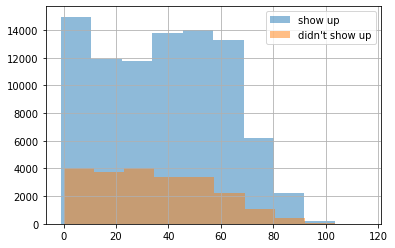

In [24]:
df.Age[df.No_show=="No"].hist(alpha=.5,label="show up")
df.Age[df.No_show=='Yes'].hist(alpha=.5,label="didn't show up")
plt.legend();


the distribution of the age nearly looks the same except the number of patients who show up is more large

we are try to investigate SMS receiving and find if there is a relationship with appointment show up

In [27]:
df.groupby('No_show').SMS_received.value_counts()

No_show  SMS_received
No       0               62510
         1               25698
Yes      0               12535
         1                9784
Name: SMS_received, dtype: int64

It looks that a great part of patients who did't show up in appointment hadn't recived SMS

calculate proportions to be more consistent and  the drawing a visualization

In [28]:
No_SMS_prop=12535/(9784+12535) 
SMS_prop = 9784/(12535+9784)

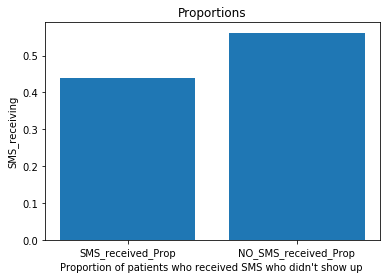

In [30]:
bar("SMS_received_Prop","NO_SMS_received_Prop",SMS_prop,No_SMS_prop,\
    "Proportion of patients who received SMS who didn't show up ","SMS_receiving","Proportions")

the bar chart shows that proportion of patients who didn't received SMS and didn't go to their appointment is greater than proportion of patient who received SMS

<a id='conclusions'></a>
## Conclusions

from my analysis it seems that there is no relationship between showing up in appointment and age or alcoholism
but may be there is positive correlation with SMS receiving

<a id='conclusions'></a>
## Limitations

there is no obvious limitaions